In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram as ph
%matplotlib inline

In [125]:
# Battleship Grid
## 0 1 2 3 4 5 6 7 8 9
#A - - - - - X X - - -
#B - - X - - - - X X X
#C - - X - - - - - - -
#D - - X - - X - - - -
#E - - - - - X - - - -
#F - - - - - X - - - -
#G - - - - - X - - - -
#H - - - - - - - - - -
#I - - - - - - - - - -
#J - - - - - X X X X X

#Acceptable solutions:
sol = [
      '0000101',
      '0000110',
      '0001100',
      '0010001',
      '0010010',
      '0010011',
      '0010110',
      '0100000',
      '0101010',
      '0101101',
      '0110111',
      '1000001',
      '1001011',
      '1101100',
      '1101101',
      '1101110',
      '1101111'
     ]
tot = len(sol)
n = 7
s = []
for i in range(n-1):
    s.append(i)

In [126]:
# 17 - 2 # 16 - 2 # 15 - 2 # 14 - 2 # 13 - 2
# 12 - 2 # 11 - 2 # 10 - 2 # 9 - 2
# 8 - 3 # 7 - 3 # 6 - 3 # 5 - 3
# 4 - 4 # 3 - 5 # 2 - 6 # 1 - 8

if tot > 8:
    rep = 2
elif tot > 4:
    rep = 3
elif tot == 4:
    rep = 4
elif tot == 3:
    rep = 5
elif tot == 2:
    rep = 6
else:
    rep = 8

In [4]:
def build_oracle(circuit, solutions):
    for i in range(tot):
        temp = solutions[i]
        for j, yesno in enumerate(reversed(temp)):
            if yesno == '0':
                circuit.x(j)
        circuit.h(n-1)
        circuit.mct(s, n-1)
        circuit.h(n-1)
        for k, noyes in enumerate(reversed(temp)):
            if noyes == '0':
                circuit.x(k)

In [5]:
def amplify(circuit):
    circuit.h(range(n))
    circuit.x(range(n))
    circuit.h(n-1)
    circuit.mct(s, n-1)
    circuit.h(n-1)
    circuit.x(range(n))
    circuit.h(range(n))

In [127]:
qc = QuantumCircuit(n)
qc.h(range(n))

for i in range(rep):
    qc.barrier()
    build_oracle(qc, sol)
    qc.barrier()
    amplify(qc)

qc.measure_all()

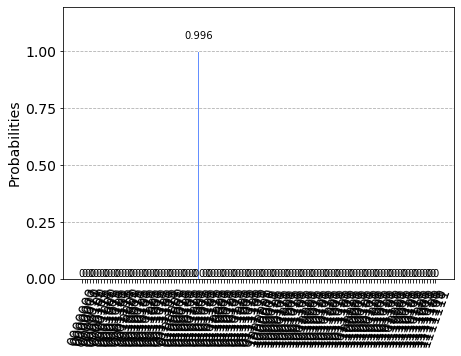

In [128]:
bknd = Aer.get_backend('qasm_simulator')
ph(execute(qc,backend=bknd,shots=1000000).result().get_counts())

In [82]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend = simulator, shots = 1).result()
counts = result.get_counts()
print(counts)

{'1001110': 1}


### Accuracy
 - 17: ~91.8%
 - 16: ~94.4%
 - 15: ~97.1%
 - 14: ~98.3%
 - 13: ~99.8%
 - 12: ~99.8%
 - 11: ~99.3%
 - 10: ~97.8%
 - 9: ~94.9%
 - 8: ~96.0%
 - 7: ~99.3%
 - 6: ~99.7%
 - 5: ~96.9%
 - 4: ~99.9%
 - 3: ~98.5%
 - 2: ~99.7%
 - 1: ~99.6%
 
 Average: ~97.8%